In [1]:
import sklearn
from sklearn.datasets import load_iris 
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils



featname = ['slength',
  'swidth',
  'plength',
  'pwidth']

data = load_iris()
data.target
data.data
x = data.data
y= data.target


X_train, X_test, Y_train, Y_test = train_test_split(x,y, train_size=0.6)

X_train
Y_train
X_test
Y_test


C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


array([1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 2, 1, 1, 2, 1, 0, 1,
       2, 2, 0, 2, 1, 0, 0, 1, 0, 1, 2, 2, 1, 0, 2, 0, 2, 0, 2, 0, 1, 0,
       2, 0, 1, 2, 1, 0, 2, 0, 2, 2, 2, 1, 2, 1, 0, 1])

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import multilayer_perceptron
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
sns.set(style='white', context='notebook', palette='deep')

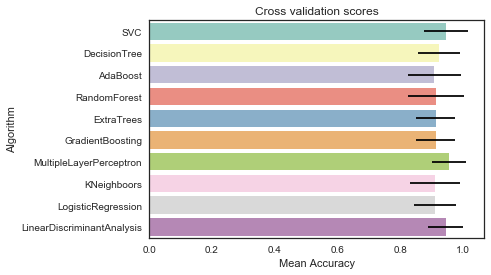

In [3]:
# Cross validate model with Kfold stratified cross val
kfold = StratifiedKFold(n_splits=10)

# Modeling step Test differents algorithms 
random_state = 2
classifiers = []
classifiers.append(SVC(random_state=random_state))
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(AdaBoostClassifier(DecisionTreeClassifier(random_state=random_state),random_state=random_state,learning_rate=0.1))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(ExtraTreesClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(MLPClassifier(random_state=random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(LinearDiscriminantAnalysis())

cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "accuracy", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["SVC","DecisionTree","AdaBoost",
"RandomForest","ExtraTrees","GradientBoosting","MultipleLayerPerceptron","KNeighboors","LogisticRegression","LinearDiscriminantAnalysis"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")

In [7]:
# Adaboost
DTC = DecisionTreeClassifier()

adaDTC = AdaBoostClassifier(DTC)

ada_param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "algorithm" : ["SAMME","SAMME.R"],
              "n_estimators" :[1,2],
              "learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3,1.5]}

gsadaDTC = GridSearchCV(adaDTC,param_grid = ada_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsadaDTC.fit(X_train,Y_train)

ada_best = gsadaDTC.best_estimator_

gsadaDTC.best_score_


from sklearn.grid_search import RandomizedSearchCV

#ExtraTrees 
ExtC = ExtraTreesClassifier()


## Search grid for optimal parameters
ex_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsExtC = GridSearchCV(ExtC,param_grid = ex_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsExtC.fit(X_train,Y_train)

ExtC_best = gsExtC.best_estimator_

# Best score
gsExtC.best_score_



# RFC Parameters tunning 
RFC = RandomForestClassifier()


## Search grid for optimal parameters
rf_param_grid = {"max_depth": [None],
              
              "min_samples_split": [2, 3, 10],
              "min_samples_leaf": [1, 3, 10],
              "bootstrap": [False],
              "n_estimators" :[100,300],
              "criterion": ["gini"]}


gsRFC = GridSearchCV(RFC,param_grid = rf_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsRFC.fit(X_train,Y_train)

RFC_best = gsRFC.best_estimator_

# Best score
gsRFC.best_score_


# Gradient boosting tunning

GBC = GradientBoostingClassifier()
gb_param_grid = {'loss' : ["deviance"],
              'n_estimators' : [100,200,300],
              'learning_rate': [0.1, 0.05, 0.01],
              'max_depth': [4, 8],
              'min_samples_leaf': [100,150],
              'max_features': [0.3, 0.1] 
              }

gsGBC = GridSearchCV(GBC,param_grid = gb_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsGBC.fit(X_train,Y_train)

GBC_best = gsGBC.best_estimator_

# Best score
gsGBC.best_score_

### SVC classifier
SVMC = SVC(probability=True)
svc_param_grid = {'kernel': ['rbf'], 
                  'gamma': [ 0.001, 0.01, 0.1, 1],
                  'C': [1, 10, 50, 100,200,300, 1000]}

gsSVMC = GridSearchCV(SVMC,param_grid = svc_param_grid, cv=kfold, scoring="accuracy", n_jobs= 4, verbose = 1)

gsSVMC.fit(X_train,Y_train)

SVMC_best = gsSVMC.best_estimator_

gsSVMC.best_score_

#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

knn_param_grid = {'n_neighbors': [1,2,3,4,5,6,7],
                  'weights': ['uniform', 'distance'],
                  'algorithm': ['ball_tree','kd_tree', 'brute', 'auto'],
                  'leaf_size': [30,50],
                  'p': [1,2],
                  
                  
                 }

gsKNN = GridSearchCV(knn,param_grid = knn_param_grid, cv=kfold, scoring="accuracy", n_jobs= 6, verbose = 1)

gsKNN.fit(X_train,Y_train)

knn_best = gsKNN.best_estimator_

gsKNN.best_score_

#Sklearn MLP
mlp = MLPClassifier()

ml_param_grid = {
    'hidden_layer_sizes': [(100,),(500,), (1000,)],    
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'alpha': [.0001,.001,.01,.1],
    'learning_rate':  ['constant', 'invscaling', 'adaptive']}

gsMLP = GridSearchCV(mlp, param_grid=ml_param_grid, cv=kfold, scoring="accuracy", n_jobs=6, verbose=1)

gsMLP.fit(X_train,Y_train)

mlp_best = gsMLP.best_estimator_


#Sklearn Linear Disciminant 
LDA = LinearDiscriminantAnalysis()

LDA_param_grid = {
    'solver' : ['svd', 'lsqr', 'eigen']}

gsLDA = GridSearchCV(LDA, param_grid=LDA_param_grid, cv=kfold, scoring="accuracy", n_jobs=6, verbose=1)

gsLDA.fit(X_train,Y_train)

LDA_best = gsLDA.best_estimator_

#Sklearn Logit Regression
LR = LogisticRegression()

LR_param_grid = {
    'penalty' : ['l1', 'l2']}

gsLR = GridSearchCV(LR, param_grid=LR_param_grid, cv=kfold, scoring="accuracy", n_jobs=4, verbose=1)

gsLR.fit(X_train,Y_train)

LR_best = gsLR.best_estimator_

gsLR.best_score_





Fitting 10 folds for each of 112 candidates, totalling 1120 fits


[Parallel(n_jobs=4)]: Done 1120 out of 1120 | elapsed:    1.4s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.2s
[Parallel(n_jobs=4)]: Done 173 out of 180 | elapsed:    6.6s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    6.7s finished


Fitting 10 folds for each of 18 candidates, totalling 180 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=4)]: Done 173 out of 180 | elapsed:    6.6s remaining:    0.2s
[Parallel(n_jobs=4)]: Done 180 out of 180 | elapsed:    6.9s finished


Fitting 10 folds for each of 72 candidates, totalling 720 fits


[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 340 tasks      | elapsed:   10.0s
[Parallel(n_jobs=4)]: Done 720 out of 720 | elapsed:   20.8s finished


Fitting 10 folds for each of 28 candidates, totalling 280 fits


[Parallel(n_jobs=4)]: Done 280 out of 280 | elapsed:    1.1s finished


Fitting 10 folds for each of 224 candidates, totalling 2240 fits


[Parallel(n_jobs=6)]: Done  43 tasks      | elapsed:    1.1s
[Parallel(n_jobs=6)]: Done 2240 out of 2240 | elapsed:    1.7s finished


Fitting 10 folds for each of 432 candidates, totalling 4320 fits


[Parallel(n_jobs=6)]: Done  40 tasks      | elapsed:    1.2s
[Parallel(n_jobs=6)]: Done 751 tasks      | elapsed:   17.2s
[Parallel(n_jobs=6)]: Done 1495 tasks      | elapsed:   39.6s
[Parallel(n_jobs=6)]: Done 2255 tasks      | elapsed:  1.1min
[Parallel(n_jobs=6)]: Done 2951 tasks      | elapsed:  1.8min
[Parallel(n_jobs=6)]: Done 4117 tasks      | elapsed:  2.6min
[Parallel(n_jobs=6)]: Done 4320 out of 4320 | elapsed:  2.8min finished
C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Fitting 10 folds for each of 3 candidates, totalling 30 fits


[Parallel(n_jobs=6)]: Done  30 out of  30 | elapsed:    1.2s finished


Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:    0.8s finished


0.9111111111111111

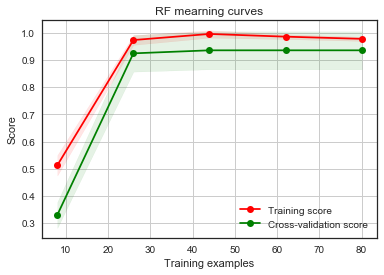

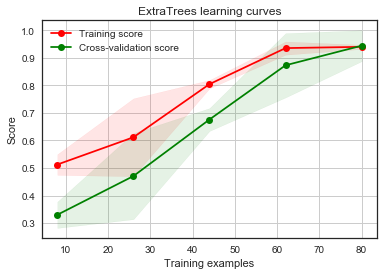

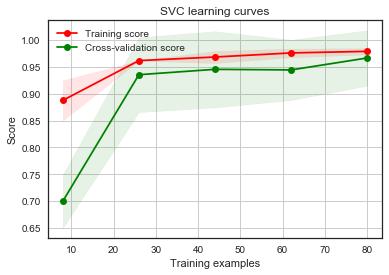

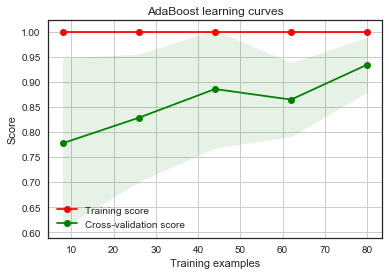

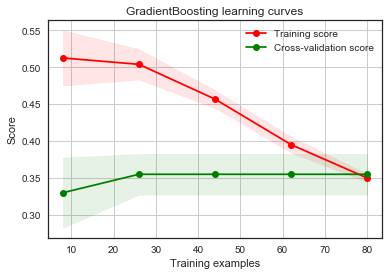

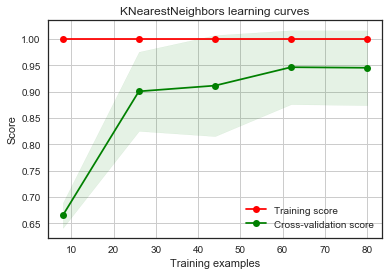

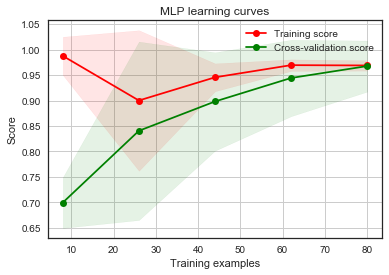

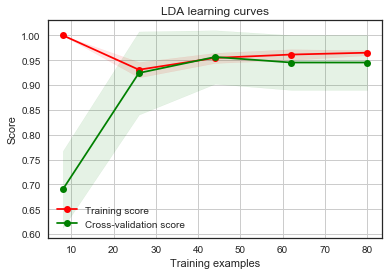

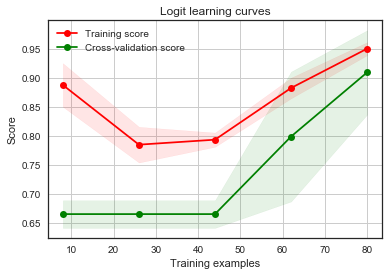

In [8]:

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

g = plot_learning_curve(gsRFC.best_estimator_,"RF mearning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsExtC.best_estimator_,"ExtraTrees learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsSVMC.best_estimator_,"SVC learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsadaDTC.best_estimator_,"AdaBoost learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsGBC.best_estimator_,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsKNN.best_estimator_,"KNearestNeighbors learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsMLP.best_estimator_,"MLP learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLDA.best_estimator_,"LDA learning curves",X_train,Y_train,cv=kfold)
g = plot_learning_curve(gsLR.best_estimator_,"Logit learning curves",X_train,Y_train,cv=kfold)

In [9]:
gsRFC_best = gsRFC.best_score_
gsExtC_best = gsExtC.best_score_
gsSVMC_best = gsSVMC.best_score_
gsadaDTC_best = gsadaDTC.best_score_
gsGBC_best = gsGBC.best_score_
gsKNN_best = gsKNN.best_score_
gsMLP_best = gsMLP.best_score_
gsLDA_best = gsLDA.best_score_
gsLR_best = gsLR.best_score_

scores = [gsRFC_best, gsExtC_best, gsSVMC_best, gsadaDTC_best, gsGBC_best, gsKNN_best, gsMLP_best,\
         gsLDA_best, gsLR_best]

scores_strings = ['gsRFC_best', 'gsExtC_best', 'gsSVMC_best', 'gsadaDTC_best', 'gsGBC_best', 'gsKNN_best', \
                  'gsMLP_best', 'gsLDA_best', 'gsLR_best']


for scorestrings, score in zip(scores_strings, scores):
    print (scorestrings + ':', np.round(score,2)*100)

gsRFC_best: 93.0
gsExtC_best: 94.0
gsSVMC_best: 97.0
gsadaDTC_best: 94.0
gsGBC_best: 36.0
gsKNN_best: 94.0
gsMLP_best: 97.0
gsLDA_best: 94.0
gsLR_best: 91.0


In [11]:
mlp_best = gsMLP.best_estimator_

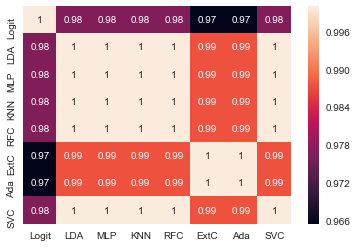

In [12]:
test_RFC = pd.Series(RFC_best.predict(X_test), name="RFC")
test_ExtC = pd.Series(ExtC_best.predict(X_test), name="ExtC")
test_SVMC = pd.Series(SVMC_best.predict(X_test), name="SVC")
test_AdaC = pd.Series(ada_best.predict(X_test), name="Ada")
test_GBC = pd.Series(GBC_best.predict(X_test), name="GBC")
test_KNN = pd.Series(knn_best.predict(X_test), name="KNN")
test_MLP = pd.Series(mlp_best.predict(X_test), name="MLP")
test_LDA = pd.Series(LDA_best.predict(X_test), name="LDA")
test_LR = pd.Series(LR_best.predict(X_test), name="Logit")


# Concatenate all classifier results
ensemble_results = pd.concat([test_LR, test_LDA, \
test_MLP,test_KNN, test_RFC,test_ExtC,test_AdaC, \
                              test_SVMC],axis=1)


g= sns.heatmap(ensemble_results.corr(),annot=True)

In [13]:
votingC = VotingClassifier(estimators=[('rfc', RFC_best), ('extc', ExtC_best),
('svc', SVMC_best), ('adac',ada_best),
 ('knn',knn_best), ('mlp', mlp_best), ('lda', LDA_best), ('lr', LR_best)],
                           voting='soft', n_jobs=10)

votingC = votingC.fit(X_train, Y_train)

votingC


VotingClassifier(estimators=[('rfc', RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=10,
            min...ty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))],
         flatten_transform=None, n_jobs=10, voting='soft', weights=None)

In [30]:
y_pred = pd.Series(votingC.predict(X_test), name="Class")





C:\Users\jdine\Documents\Anaconda3\envs\tensorflowlatest\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


0     1
1     1
2     0
3     2
4     0
5     0
6     0
7     0
8     1
9     1
10    1
11    0
12    0
13    0
14    1
15    2
16    1
17    1
18    2
19    1
20    0
21    1
22    2
23    2
24    0
25    2
26    1
27    0
28    0
29    1
30    0
31    1
32    2
33    2
34    1
35    0
36    2
37    0
38    2
39    0
40    2
41    0
42    1
43    0
44    2
45    0
46    1
47    2
48    1
49    0
50    2
51    0
52    2
53    2
54    2
55    1
56    2
57    1
58    0
59    1
Name: Class, dtype: int32

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

accuracy_score(Y_test,y_pred)

1.0

In [32]:
confusion_matrix(Y_test, y_pred)


array([[22,  0,  0],
       [ 0, 20,  0],
       [ 0,  0, 18]], dtype=int64)